### 根据训练好的模型做预测

In [1]:
from keras.models import model_from_json
from pathlib import Path
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
# 将CIFAR10中的分类标签按照0--9的顺序表示为数组中的名称
class_labels = [
    "Plane",
    "Car",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Boat",
    "Truck"
]

# 加载包含模型结构信息的json文件
f = Path("model_structure.json")
model_structure = f.read_text()

# 根据json文件信息重构CNN模型
model = model_from_json(model_structure)

# 加载模型预训练好的权重参数
model.load_weights("model_weights.h5")


这是一张 Dog 图片， - 可能性为: 1.000000


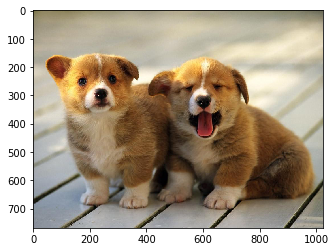

In [3]:
# 加载测试图片，图片尺寸缩放为 32x32 像素
img = image.load_img("dog-3.png", target_size=(32, 32))

# 图像转换为三维数组
image_to_test = image.img_to_array(img)

# 为图片添加一个维度，变为四维数组 (因为模型被设计为一次读入一个数据集)
list_of_images = np.expand_dims(image_to_test, axis=0)

# 做预测
results = model.predict(list_of_images)

# 因为上边一次读入一张图片，所以这里返回结果集中的第一个元素
single_result = results[0]

# 返回可能性最大的分类对应的下标索引值
most_likely_class_index = int(np.argmax(single_result))
class_likelihood = single_result[most_likely_class_index]

# 返回最有可能的图片类型名称
class_label = class_labels[most_likely_class_index]

# 打印结果
print("这是一张 {} 图片， - 可能性为: {:2f}".format(class_label, class_likelihood))

# 显示原图
img2 = image.load_img("dog-3.png")
image_to_array = image.img_to_array(img2)
image_to_array = image_to_array.astype('int32')
plt.imshow(image_to_array);